## Packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Loading the data

In [2]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [3]:
df_comp = raw_data.copy()

In [4]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [5]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

## Creating Returns

In [6]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [7]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

## Splitting the Data

In [8]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Fitting a Model

In [9]:
model_ar = ARIMA(df.ftse, order = (1,0,0))
results_ar = model_ar.fit()

## Simple Forecasting

In [10]:
df.tail()

spx          dax         ftse        nikkei   ret_spx  \
                                                                            
Date                                                                        
2014-07-08  1963.709961  9772.669922  6738.500000  15314.410156 -0.704880   
2014-07-09  1972.829956  9808.200195  6718.000000  15302.650391  0.464427   
2014-07-10  1964.680054  9659.129883  6672.399902  15216.469727 -0.413107   
2014-07-11  1967.569946  9666.339844  6690.200195  15164.040039  0.147092   
2014-07-14  1977.099976  9783.009766  6746.100098  15296.820312  0.484355   

            ret_ftse   ret_dax ret_nikkei norm_ret_spx norm_ret_ftse  \
                                                                       
Date                                                                   
2014-07-08 -1.245695 -1.346653  -0.422839   -61.680354    794.952349   
2014-07-09 -0.304222  0.363568  -0.076789    40.639543    194.142222   
2014-07-10 -0.678775 -1.519854  -0.563175   -36.148835    433.166778   
2014-07-11  0.266775  0.074644  -0.344559    12.871270   -170.245033   
2014-07-14  0.835549  1.206971   0.875626    42.383382   -533.213704   

            norm_ret_dax norm_ret_nikkei  
                                          
Date                                      
2014-07-08 -59866.246313      -23.991315  
2014-07-09  16162.615912       -4.356898  
2014-07-10 -67565.994483      -31.953776  
2014-07-11   3318.342727      -19.549802  
2014-07-14  53656.603796       49.681837

In [11]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error

start_date = '2014-07-15'
end_date = '2015-01-01'

In [12]:
df_pred = results_ar.predict(start = start_date, end= end_date)

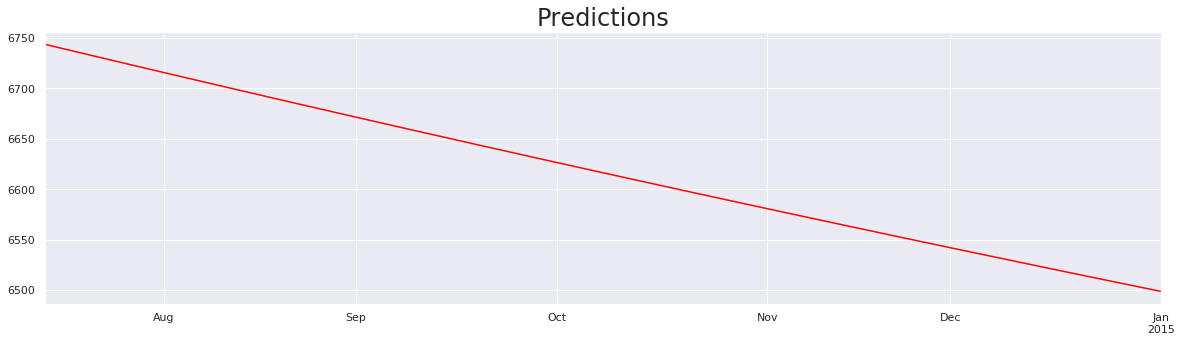

In [13]:
df_pred[start_date:end_date].plot(figsize=(20,5), color = 'red')
plt.title('Predictions', size=24);

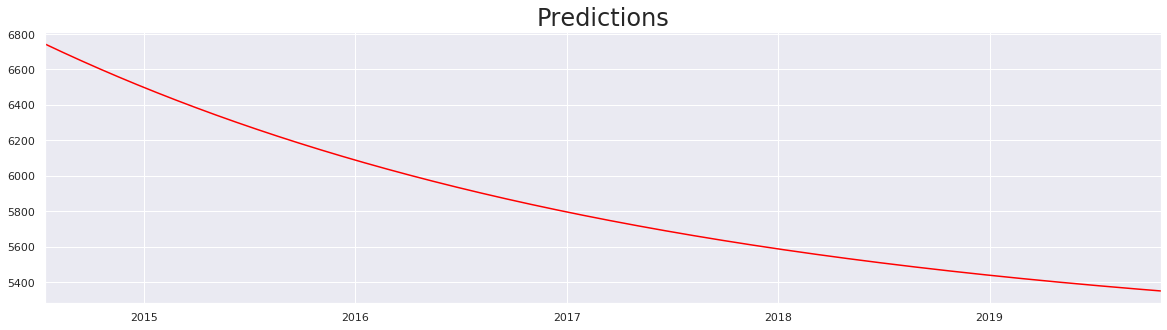

In [14]:
start_date = '2014-07-15'
end_date = '2019-10-23'

df_pred = results_ar.predict(start = start_date, end= end_date)

df_pred[start_date:end_date].plot(figsize=(20,5), color = 'red')
plt.title('Predictions', size=24);

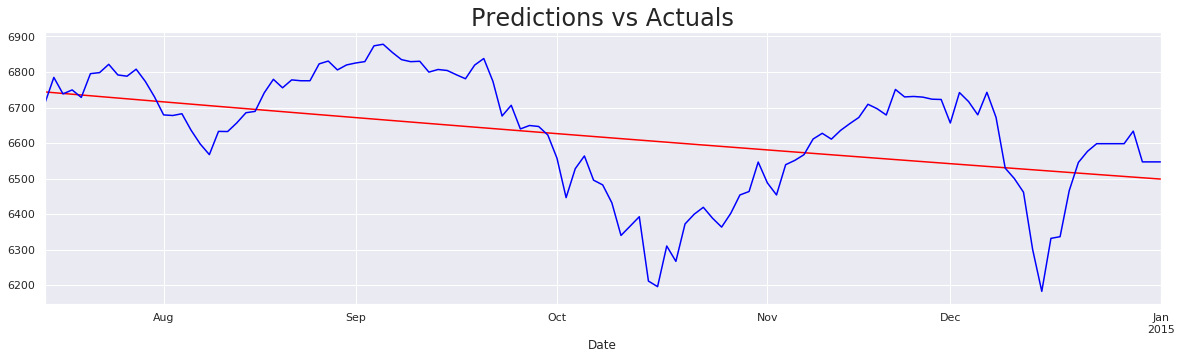

In [15]:
start_date = '2014-07-15'
end_date = '2015-01-01'


df_pred = results_ar.predict(start = start_date, end= end_date)
df_pred[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals', size=24);

### Using Returns Instead

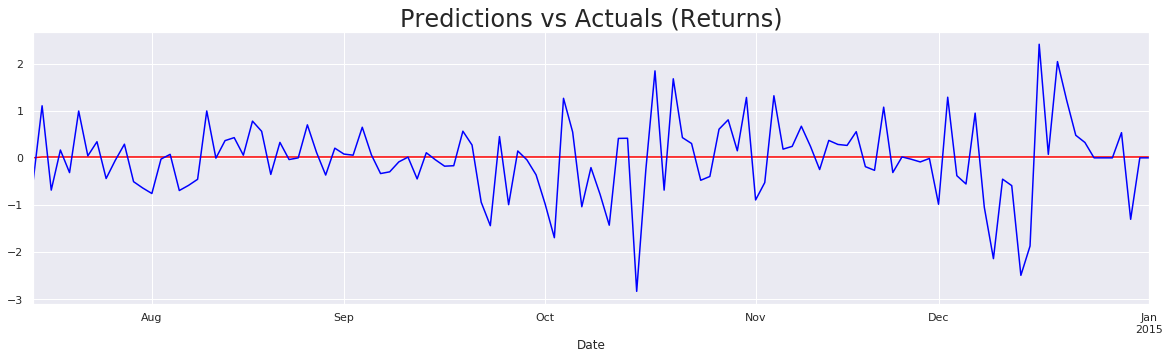

In [16]:
end_date = '2015-01-01'

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (1,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end= end_date)

df_pred_ar[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals (Returns)', size=24);

In [17]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5351
Model:                     ARMA(1, 0)   Log Likelihood               -8344.626
Method:                       css-mle   S.D. of innovations              1.151
Date:                Tue, 31 Mar 2020   AIC                          16695.252
Time:                        09:20:23   BIC                          16715.007
Sample:                    01-10-1994   HQIC                         16702.152
                         - 07-14-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0192      0.015      1.247      0.212      -0.011       0.049
ar.L1.ret_ftse    -0.0230      0.014     -1.686      0.092      -0.050       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.3965           +0.0000j           43.3965            0.5000
-----------------------------------------------------------------------------
"""

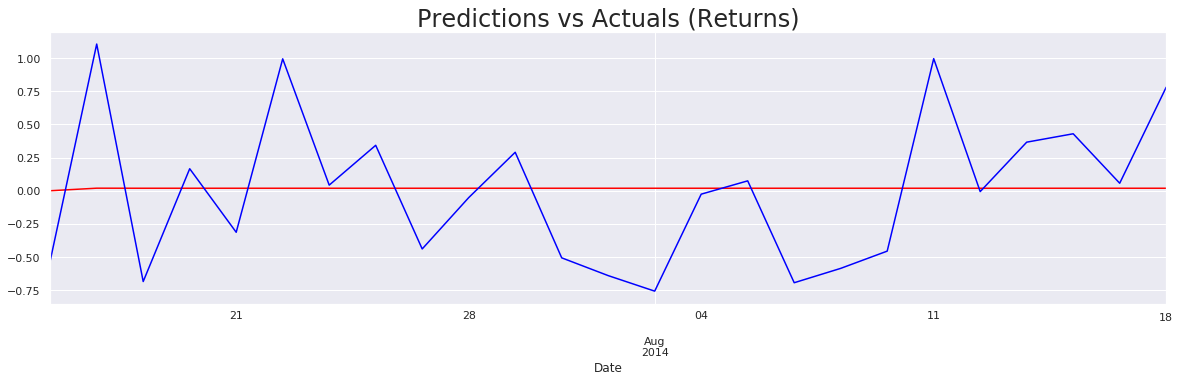

In [18]:
end_date = '2014-08-18'

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (1,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end= end_date)

df_pred_ar[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals (Returns)', size=24);

### MA

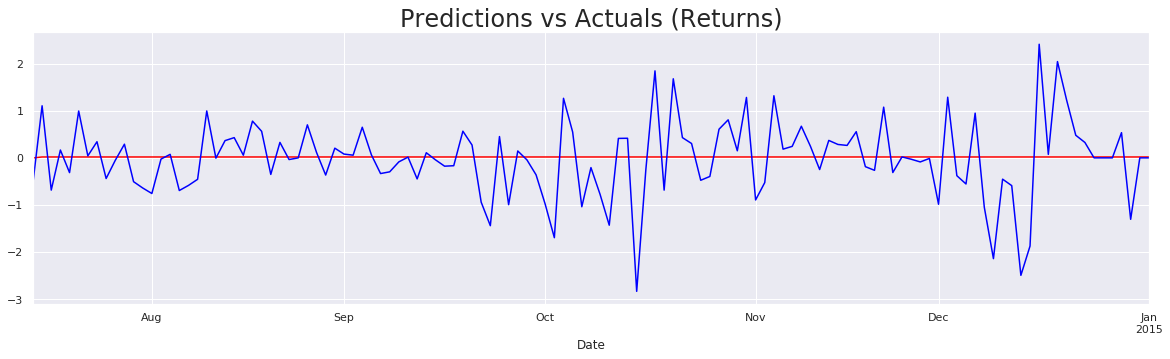

In [19]:
end_date = '2015-01-01'

model_ret_ma = ARIMA(df.ret_ftse[1:], order = (0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start = start_date, end= end_date)

df_pred_ma[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals (Returns)', size=24);

In [20]:
df_pred_ma.head()

2014-07-15   -0.001945
2014-07-16    0.019181
2014-07-17    0.019181
2014-07-18    0.019181
2014-07-21    0.019181
Freq: B, dtype: float64

### ARMA

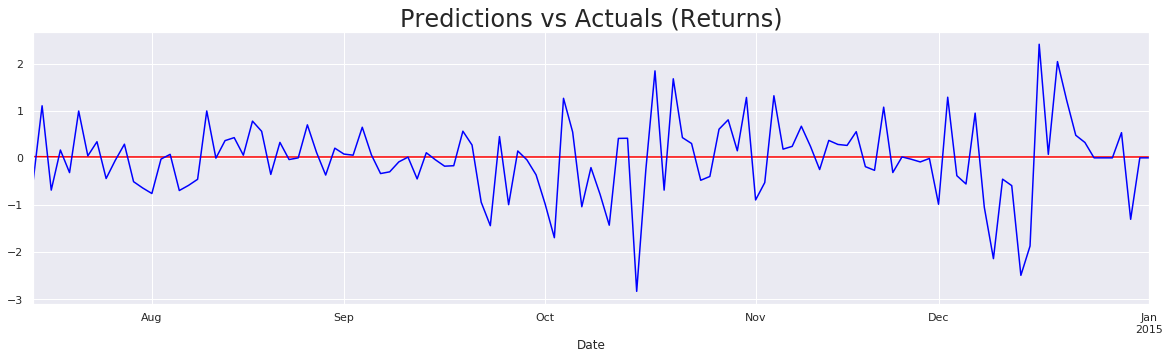

In [21]:
end_date = '2015-01-01'

model_ret_ar_ma = ARIMA(df.ret_ftse[1:], order = (1,0,1))
results_ret_ar_ma = model_ret_ar_ma.fit()

df_pred_ar_ma = results_ret_ar_ma.predict(start = start_date, end= end_date)

df_pred_ar_ma[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals (Returns)', size=24);

In [22]:
df_pred_ar_ma.head()

2014-07-15    0.026788
2014-07-16    0.025055
2014-07-17    0.023718
2014-07-18    0.022688
2014-07-21    0.021894
Freq: B, dtype: float64

In [23]:
df_pred_ar_ma.tail()

2014-12-26    0.019223
2014-12-29    0.019223
2014-12-30    0.019223
2014-12-31    0.019223
2015-01-01    0.019223
Freq: B, dtype: float64

### ARMAX

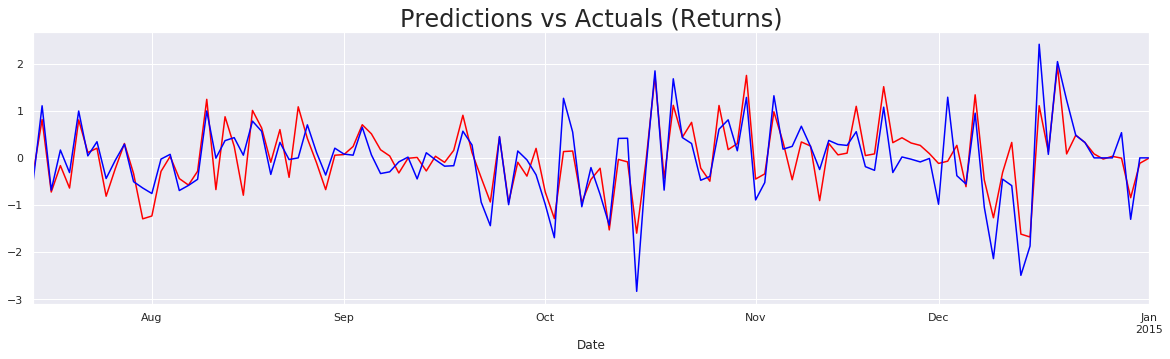

In [24]:
end_date = '2015-01-01'

model_ret_armax = ARIMA(df.ret_ftse[1:], order = (1,0,1),
                       exog=df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:] )
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end= end_date,
                                         exog=df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date])

df_pred_armax[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals (Returns)', size=24);

### SARMA

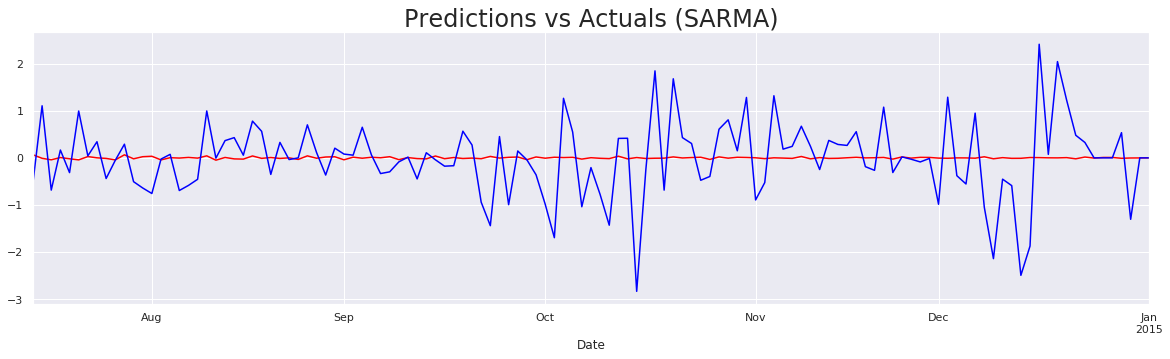

In [25]:
end_date = '2015-01-01'

model_ret_sarma = SARIMAX(df.ret_ftse[1:], order = (3,0,4), seasonal_order=(3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()

df_pred_sarma = results_ret_sarma.predict(start = start_date, end= end_date)

df_pred_sarma[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals (SARMA)', size=24);

### SARIMAX

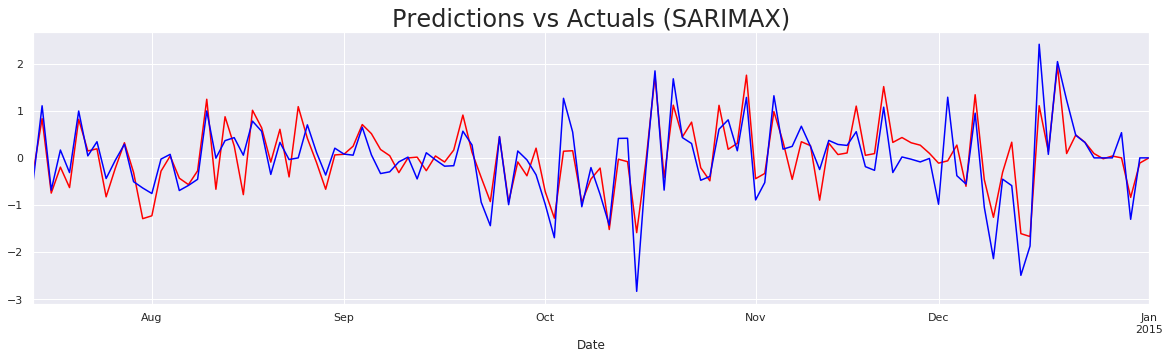

In [26]:
end_date = '2015-01-01'

model_ret_sarimax = SARIMAX(df.ret_ftse[1:], order = (3,0,4), 
                            exog=df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                            seasonal_order=(3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end= end_date,
                                             exog=df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date])

df_pred_sarimax[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Predictions vs Actuals (SARIMAX)', size=24);

### Auto ARIMA

In [28]:
model_auto = auto_arima(df.ret_ftse[1:], exogenous=df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                       m = 5, max_order= None, max_p=7, max_q = 7, max_d = 2, max_P=4, max_Q=4,
                       max_D=2, maxiter=50, alpha=0.05, n_jobs=-1, trend='ct')

In [34]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous=df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date]),
                                               index = df_test[start_date:end_date].index)

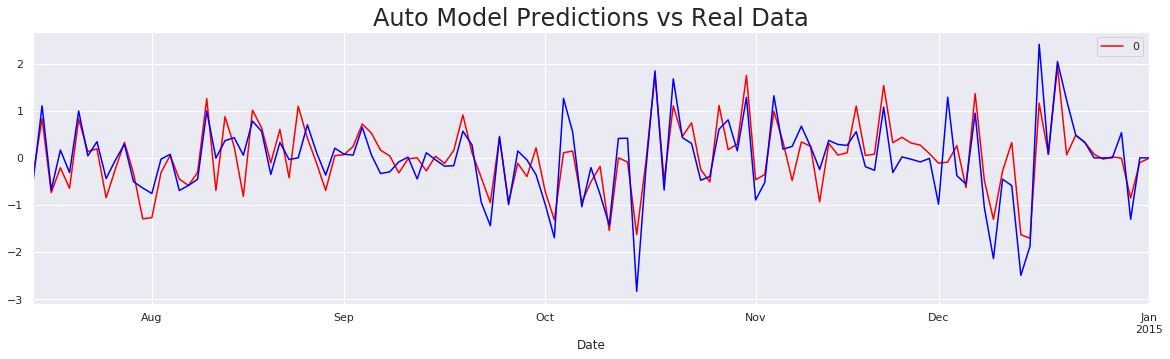

In [35]:
df_auto_pred.plot(figsize=(20,5), color='red')

df_test.ret_ftse[start_date:end_date].plot(figsize=(20,5), color = 'blue')

plt.title('Auto Model Predictions vs Real Data', size=24);

### Comparing All the Models (Returns)

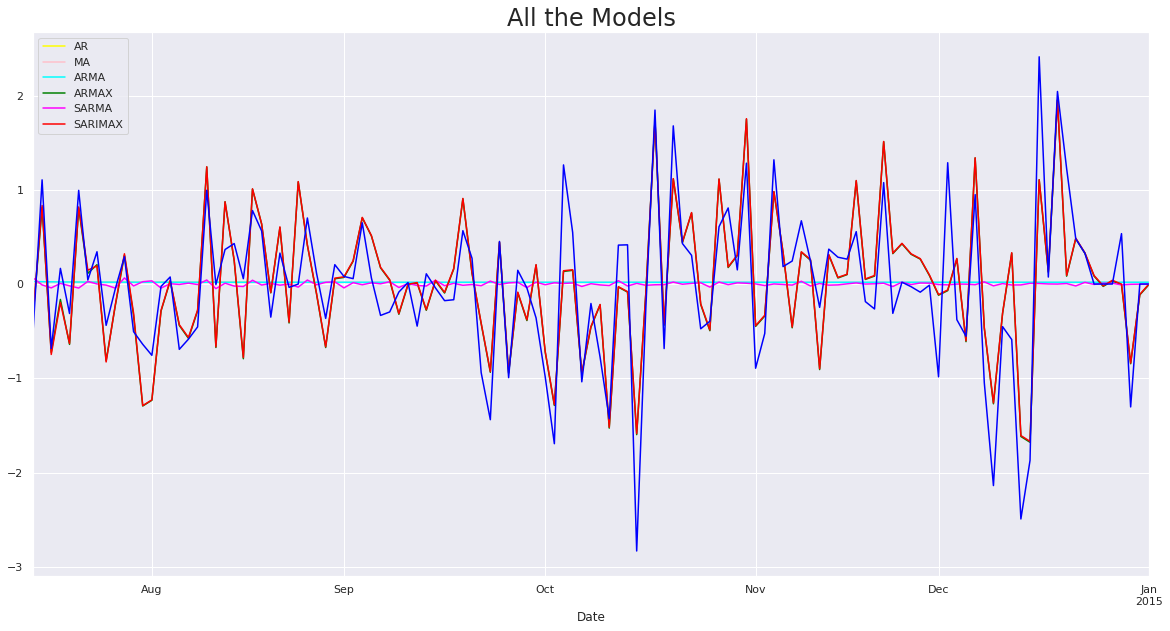

In [37]:
end_date = "2015-01-01"
df_pred_ar[start_date:end_date].plot(figsize = (20,10), color = "yellow")
df_pred_ma[start_date:end_date].plot(color = "pink")
df_pred_ar_ma[start_date:end_date].plot(color = "cyan")
df_pred_armax[start_date:end_date].plot(color = "green")
df_pred_sarma[start_date:end_date].plot(color = "magenta")
df_pred_sarimax[start_date:end_date].plot(color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models", size = 24)
plt.show()

### Forecasting Volatility

In [39]:
model_garch = arch_model(df_comp.ret_ftse[1:], vol = 'GARCH', p=1, q=1,
                        mean = 'constant', dist='Normal')
res_garch = model_garch.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:     74,   Neg. LLF: 7310.971075776178
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7310.970363582692
            Iterations: 12
            Function evaluations: 86
            Gradient evaluations: 12


In [40]:
pred_garch = res_garch.forecast(horizon = 1, align = 'target')

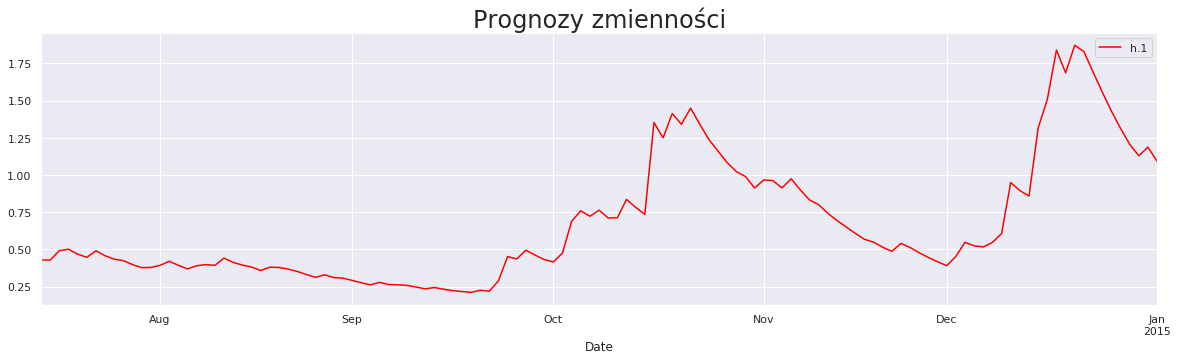

In [41]:
pred_garch.residual_variance[start_date:end_date].plot(figsize=(20,5), color = 'red')
plt.title('Prognozy zmienności', size = 24);

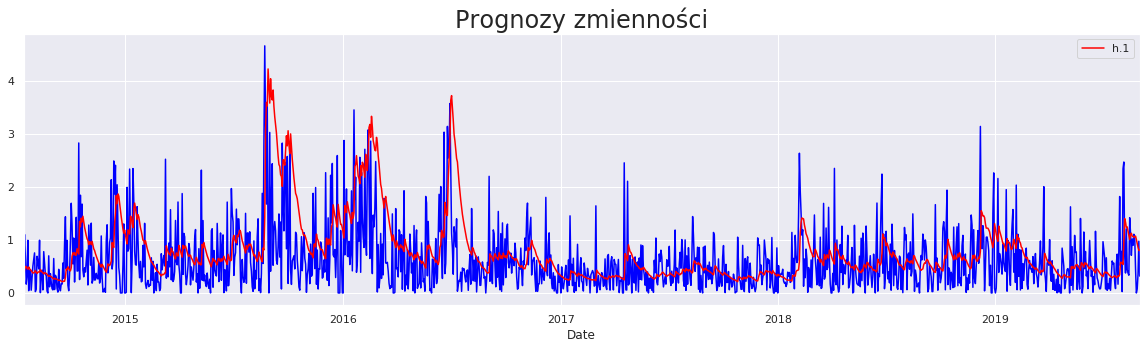

In [43]:
pred_garch.residual_variance[start_date:].plot(figsize=(20,5), color = 'red')
df_test.ret_ftse.abs().plot(color='blue', zorder = 1)
plt.title('Prognozy zmienności', size = 24);

In [44]:
pred_garch = res_garch.forecast(horizon = 100, align = 'target')
pred_garch.residual_variance[-1:]

h.001     h.002     h.003     h.004     h.005    h.006  \
Date                                                                    
2019-08-30  0.811557  0.805781  0.867415  0.940839  1.021018  1.08532   

               h.007     h.008     h.009    h.010  ...     h.091     h.092  \
Date                                               ...                       
2019-08-30  1.074388  1.068147  1.081584  1.09103  ...  0.838338  0.839944   

               h.093     h.094     h.095     h.096     h.097     h.098  \
Date                                                                     
2019-08-30  0.831341  0.816512  0.828155  0.840395  0.851712  0.865233   

               h.099     h.100  
Date                            
2019-08-30  0.872802  0.887278  

[1 rows x 100 columns]

### Multvariate Regression Model

In [46]:
from statsmodels.tsa.api import VAR

In [48]:
df_ret = df[['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei']][1:]

In [49]:
model_var_ret = VAR(df_ret)
model_var_ret.select_order(20)
results_var_ret = model_var_ret.fit(ic = 'aic')

In [50]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 31, Mar, 2020
Time:                     11:30:23
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.331645
Nobs:                     5346.00    HQIC:                  0.264327
Log likelihood:          -30868.5    FPE:                    1.25633
AIC:                     0.228191    Det(Omega_mle):         1.23678
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.039147         0.016160            2.422           0.015
L1.ret_spx           -0.110595         0.017558           -6.299           0.000
L1.ret_dax            0.065376         0.019032           

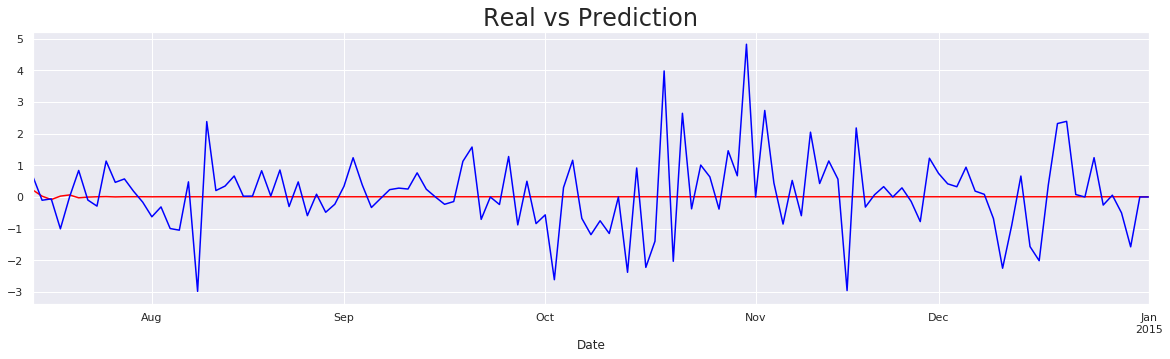

In [51]:
lag_order_ret = results_var_ret.k_ar
var_pred_ret = results_var_ret.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))

df_ret_pred = pd.DataFrame(data = var_pred_ret, index = df_test[start_date:end_date].index,
                                columns = df_test[start_date:end_date].columns[4:8])

df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize = (20,5), color = "red")

df_test.ret_nikkei[start_date:end_date].plot(color = "blue")
plt.title("Real vs Prediction", size = 24);

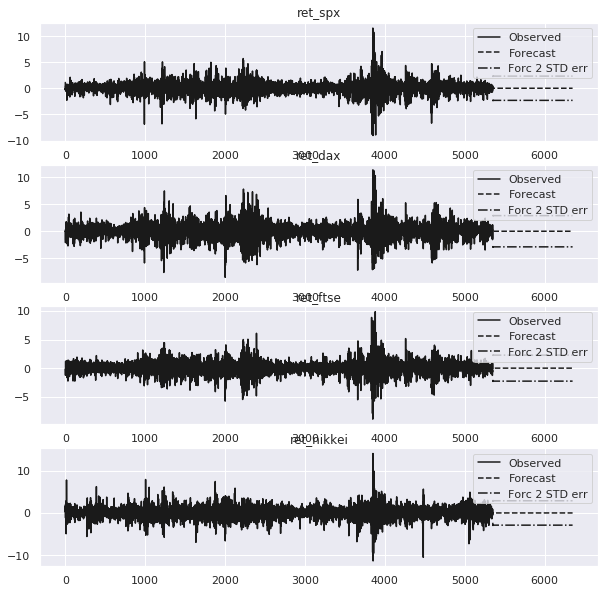

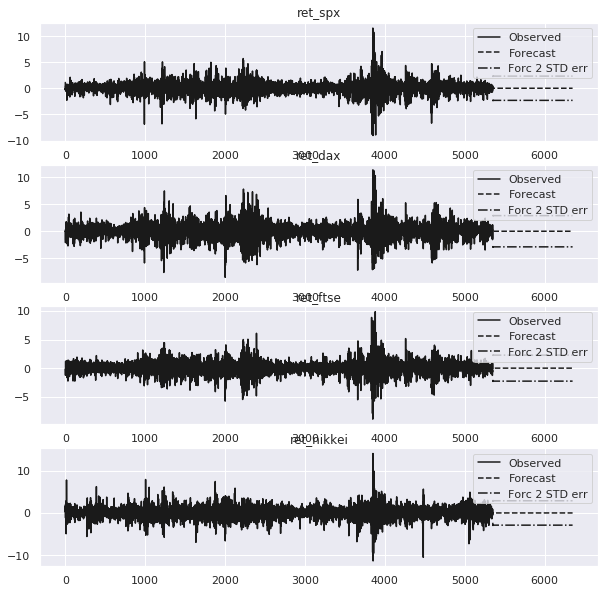

In [52]:
results_var_ret.plot_forecast(1000)